# importhing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.api import qqplot

import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [2]:
df = pd.read_csv("insurance.csv") # importing the dataset
df.head() # displays the first 5 columns of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Understanding the dataset

In [3]:
df.shape # displays the number of rows and columns in the dataset

(1338, 7)

In [4]:
df.columns # displays column names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.info() # displays the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe().T # describes about the dataset. T is for transpose

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
df.isnull().sum() #displays the number of null values in the dataset. Fortunately none

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df["sex"].value_counts() # displays the unique values of sex feature(column) and their count

male      676
female    662
Name: sex, dtype: int64

In [9]:
df["children"].value_counts() # displays the unique values of children feature and their count

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [10]:
df["smoker"].value_counts() # displays the unique values of smoker feature and their count

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
df["region"].value_counts() # displays the unique values of region feature and their count

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
df["charges"].value_counts() # displays the unique values of charges feature and their count

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [13]:
df = df.drop_duplicates() # removes duplicates from our data
df.shape

(1337, 7)

In [14]:
# This is a template to find if a feature is categorical or numerical or numerical value thats actually categorical e.g(year)

  
'''
    dataframe - > variable containing our dataset 
    cat_th -> categorical variable's class threshold
    car_th -> cardinal variable's class threshold
'''

def grab_col_names(dataframe, cat_th=10, car_th=20): 

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]            # categorical columns with type object 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and # categorical variable with numerical appearance
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and # Cardinal variable with categorical appearance
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat                                                        # all categorical variables

    cat_cols = [col for col in cat_cols if col not in cat_but_car]                           # removing cardinal variables

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]            # numerical columns with type number

    num_cols = [col for col in num_cols if col not in num_but_cat]                           # removing categorical variables

    # prints the number of each category
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car,num_but_cat                                       # returns all categorical numerical and cardinal variables

In [15]:
cat_cols, num_cols, cat_but_car,num_but_cat = grab_col_names(df)

Observations: 1337
Variables: 7
cat_cols: 4
num_cols: 3
cat_but_car: 0
num_but_cat: 1


# Data Visualisation

In [16]:
''' 
    function takes a single dataframe column name as argument and
    plots a 1 x 2 subplot contains (pie plot and bar plot) 
'''
def plot_categorical(col_name):

  # sets 1 x 2 subplots with figure size of (13,9)
  fig,axes = plt.subplots( 1, 2, figsize = (13,9))

  # plots pie chart of given column with % percentage
  df[col_name].value_counts().plot.pie(autopct="%.0f%%", shadow=True,startangle=180,ax=axes[0])

  # plots barplot of given column
  df[col_name].value_counts().plot.bar(ax = axes[1] )

  # set plot's title
  fig.suptitle(col_name.title())
  
  # shows the plot
  plt.show()

In [17]:
'''
    function takes a single dataframe column name as argument and
    plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
'''
def plot_distribution(col_name):

  # sets 2 x 2 subplots with figure size of (12,8)
  fig,axes = plt.subplots( 2, 2, figsize = (12,8) )

  # displays histogram of the given dataframe column
  sns.histplot( x = col_name, data = df, ax = axes[0][0],hue = "region",bins = 20 )

  # displays quantile-quantile plot of the given dataframe column
  qqplot( data = df[col_name], ax = axes[0][1], line = "45", fit = True )

  # displays kernel density estimate plot of the given dataframe column
  sns.kdeplot( x = col_name, data= df,hue="region", ax = axes[1][0], fill = True )

  # displays cumulative density plot of the given dataframe column 
  sns.kdeplot( x = col_name, data= df, ax = axes[1][1], hue = "region",fill = True, cumulative = True ) 

  # sets the title for the subplot as "Distribution of <column name>"  
  plt.suptitle( "Distribution of " + col_name )

  plt.show()  # shows the plot

In [18]:
'''
    function takes a single dataframe column name as argument and
    plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot)
'''
def plot_stats(col_name):

    # sets 2 x 2 subplots with figure size of (14,10)
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  

    # displays boxplot of the given dataframe column
    sns.boxplot(y=col_name, x="sex", data=df, ax=axes[0][0],) 

    # displays violinplot of the given dataframe column
    sns.violinplot(y=col_name, x="region", data=df, ax=axes[0][1], split=True,)  

    # displays swarmplot of the given dataframe columns
    sns.swarmplot(y=col_name, x="sex", data=df, ax=axes[1][0])  

    # displays barplot of the given dataframe column respect to 'Outcome' column
    sns.barplot(x="region", y=col_name, data=df, hue="region",)  

    # sets the title for the subplot as "Statistics of <column name>"
    plt.suptitle("Statistics of " + col_name)  


    plt.show()  # shows the plot

In [19]:
'''
  function takes a single dataframe column name as argument and
  plots a single plot contains kernel density estimate plot
'''
def plot_kde(col_name, by):

    # sets a seaborn FacetGrid with hue = "Outcome" and palette as "set2"
    facet = sns.FacetGrid(df, hue=by, aspect=4) 

    # kernel density plot of the given dataframe column respect to the dependent column "Outcome"
    facet.map(sns.kdeplot, col_name, shade=True)  

    # sets the x axis from 0 to maximum value of the column
    facet.set( xlim=(0, df[col_name].max()))  

    facet.add_legend()  # add legend to the plot

    # sets the title for the plot as "<column name> respect to <by name>"
    plt.title(f"{col_name} respect to {by}")  
    
    plt.show()  # shows the plot

In [20]:
print("cat_cols :",cat_cols,"\nnum_cols :",num_cols) # To check categorical and numerical columns before plotting

cat_cols : ['sex', 'smoker', 'region', 'children'] 
num_cols : ['age', 'bmi', 'charges']


## sex

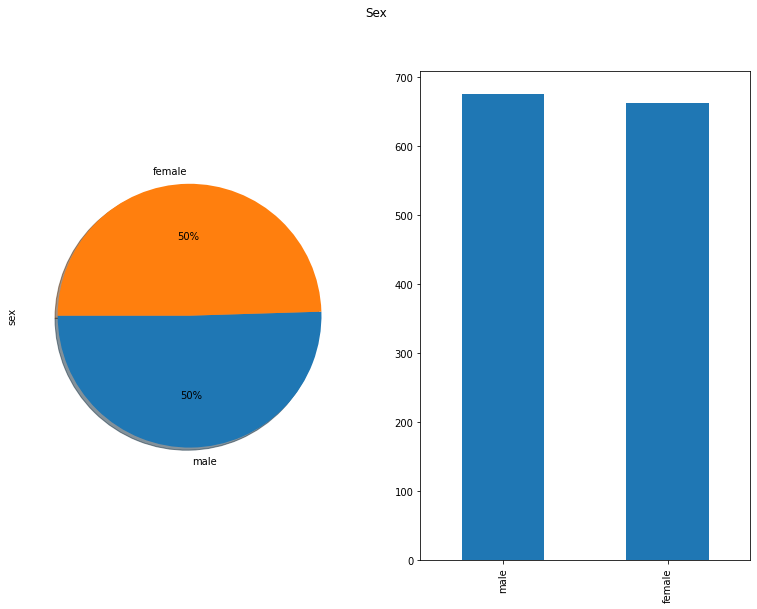

In [21]:
plot_categorical('sex') 

## smoker

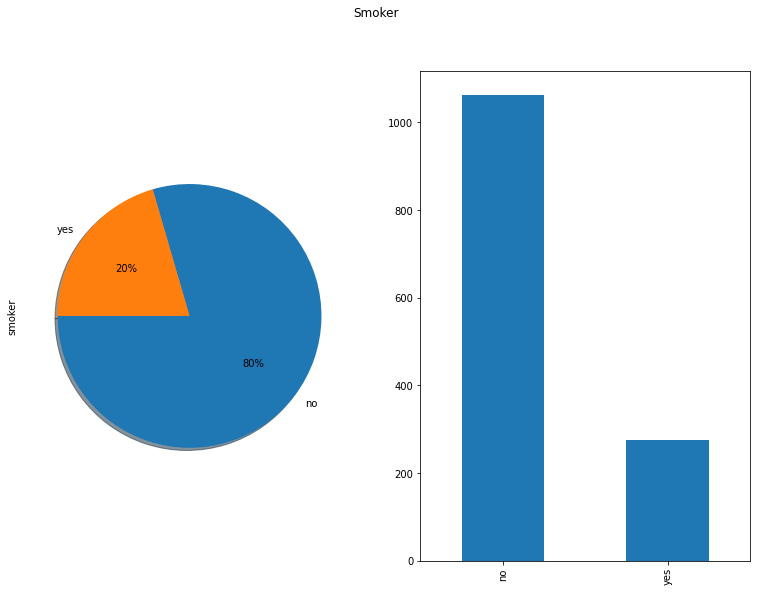

In [22]:
plot_categorical('smoker')

## region

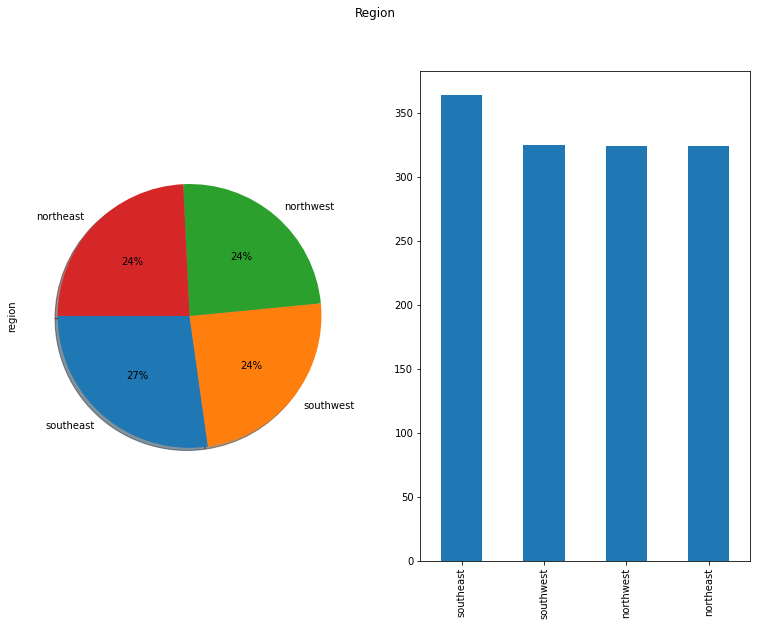

In [23]:
plot_categorical('region')

## children

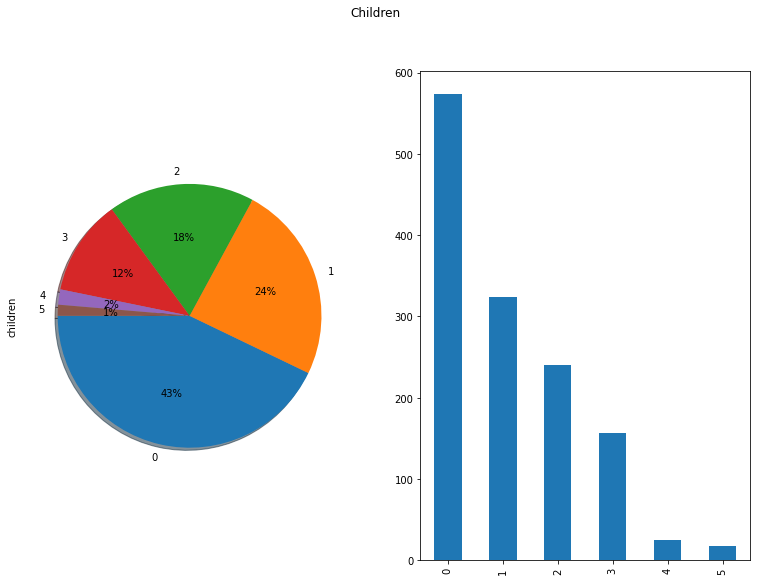

In [24]:
plot_categorical('children')

## age

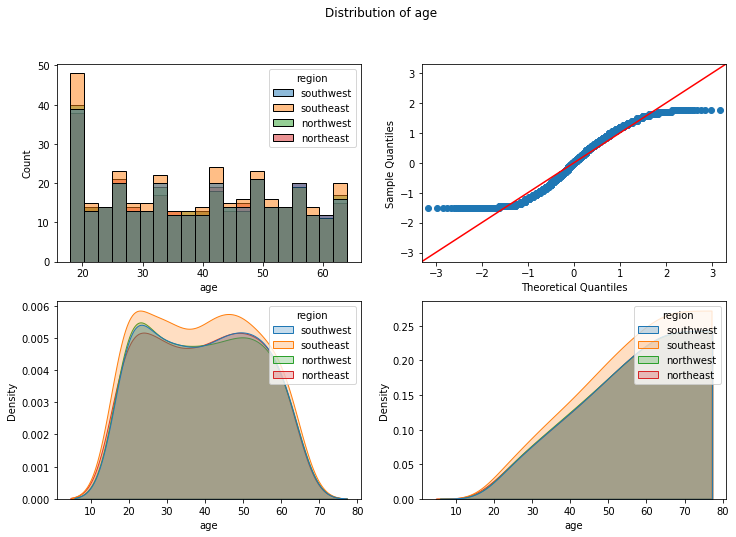

In [25]:
plot_distribution('age')

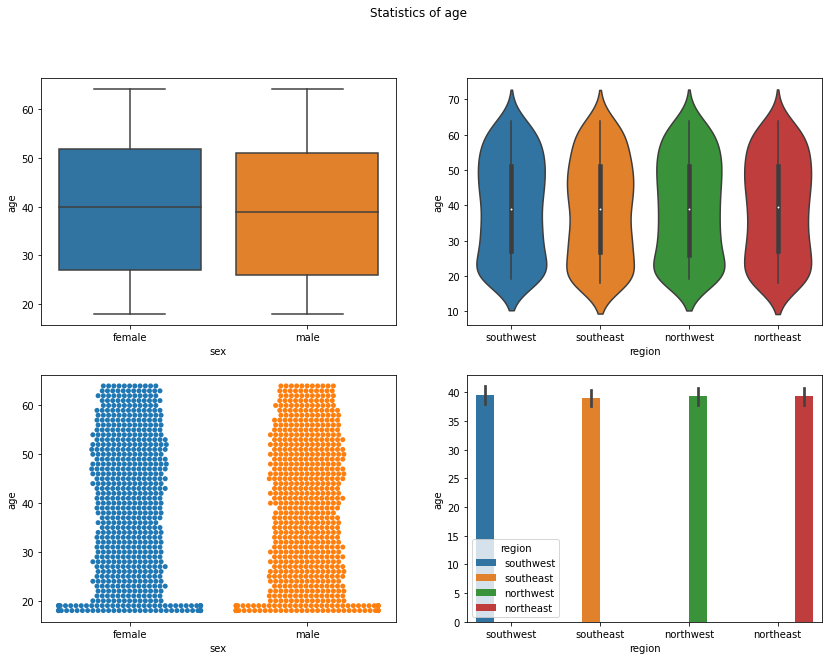

In [26]:
plot_stats('age')

## bmi

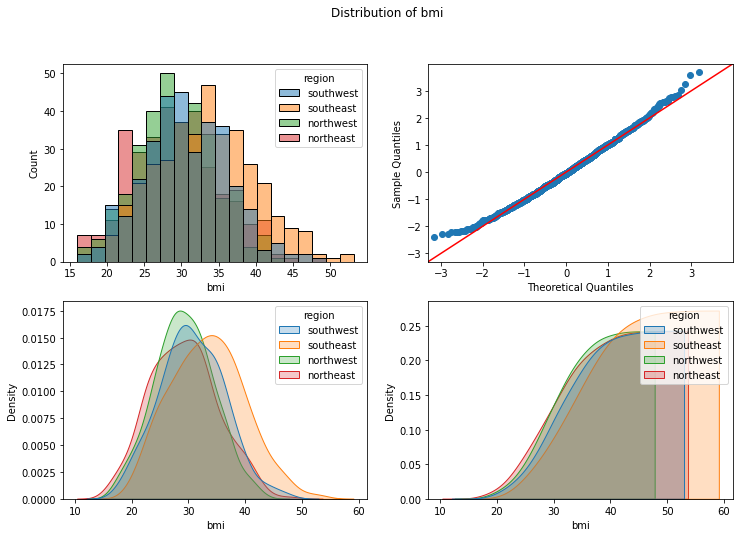

In [27]:
plot_distribution('bmi')

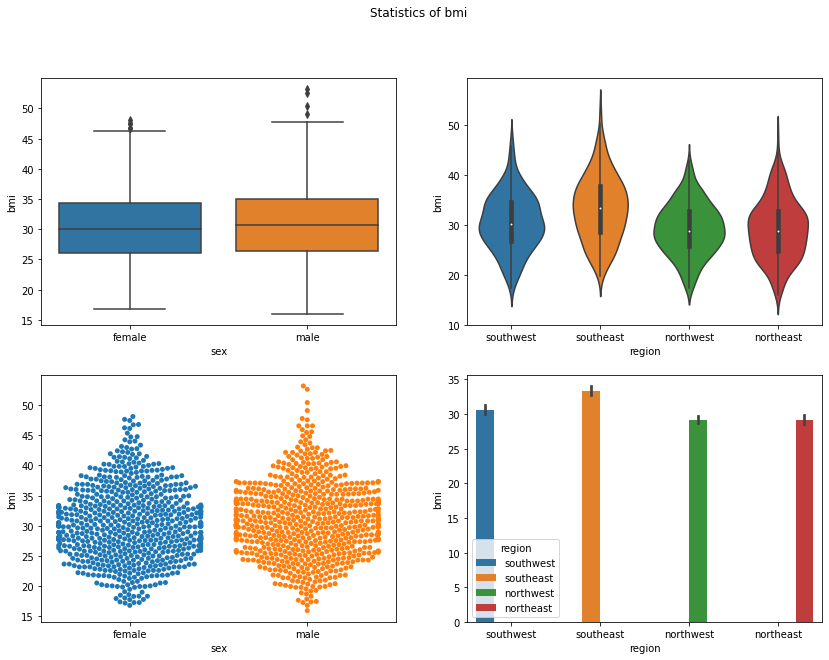

In [28]:
plot_stats('bmi')

## charges

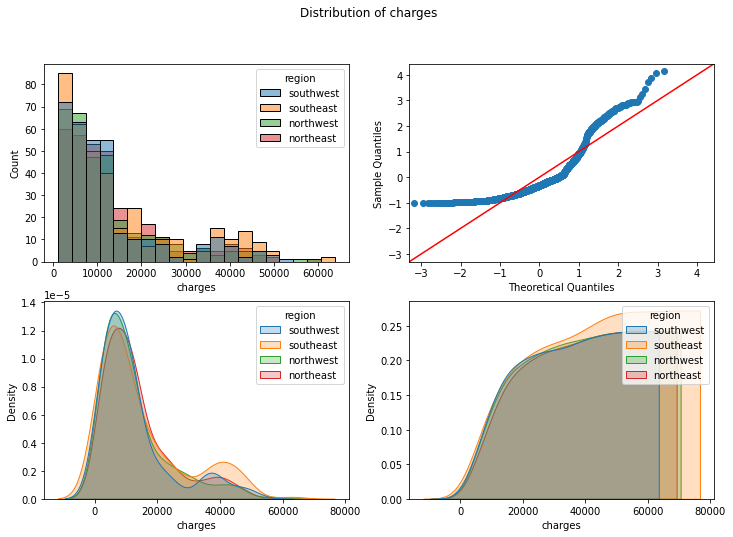

In [29]:
plot_distribution("charges")

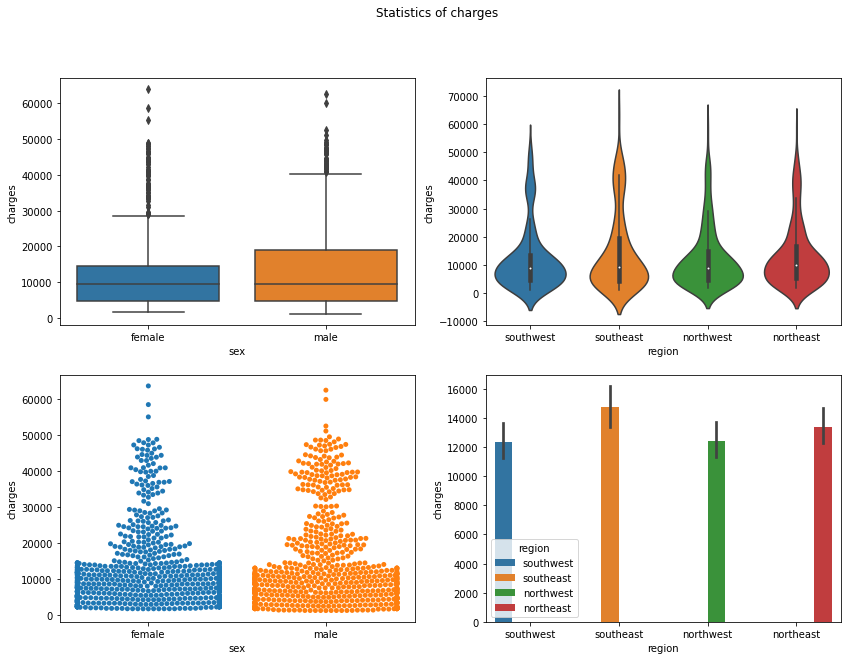

In [30]:
plot_stats("charges")

## Kde plots

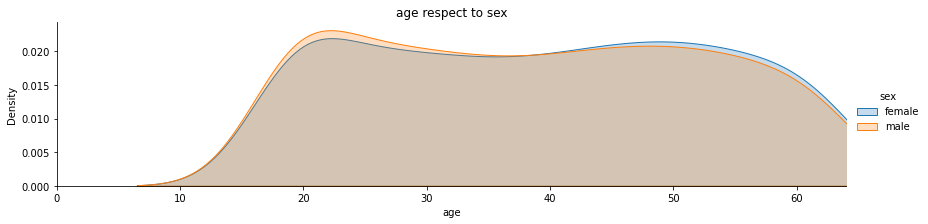

In [31]:
plot_kde('age',"sex")

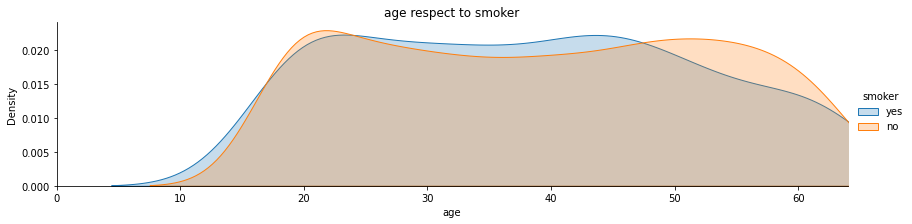

In [32]:
plot_kde('age',"smoker")

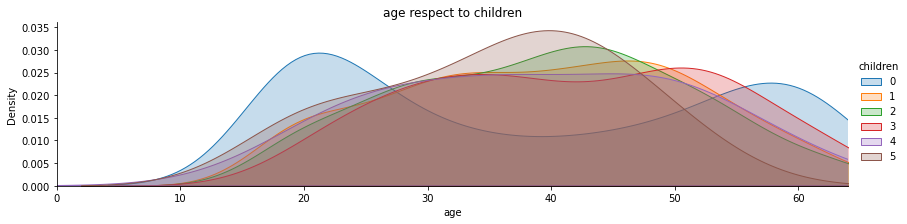

In [33]:
plot_kde('age',"children")

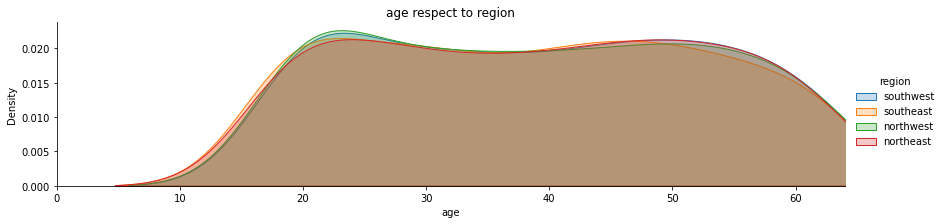

In [34]:
plot_kde('age',"region")

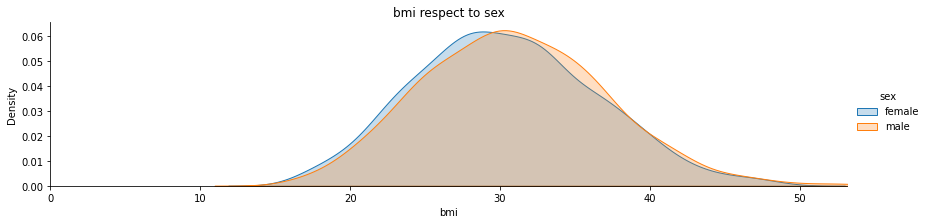

In [35]:
plot_kde('bmi',"sex")

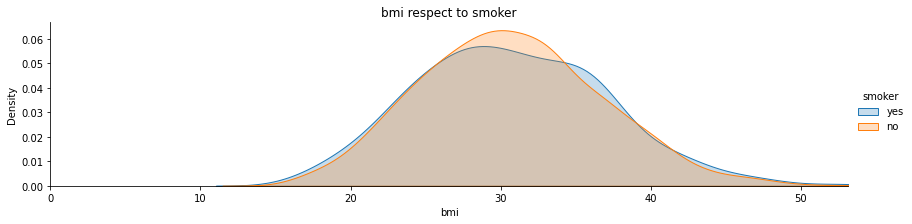

In [36]:
plot_kde('bmi',"smoker")

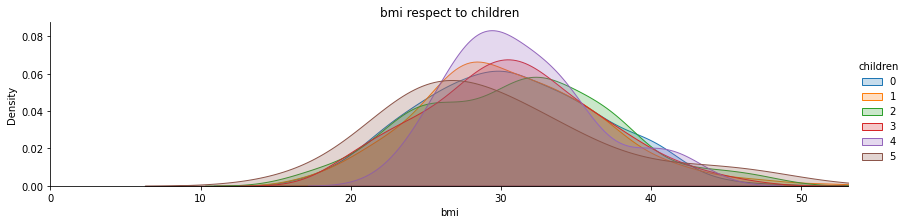

In [37]:
plot_kde('bmi',"children")

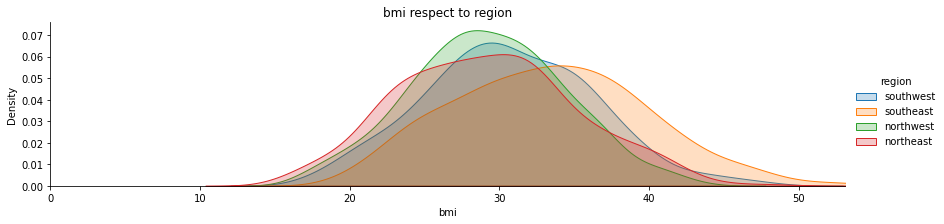

In [38]:
plot_kde('bmi',"region")

## Relplot

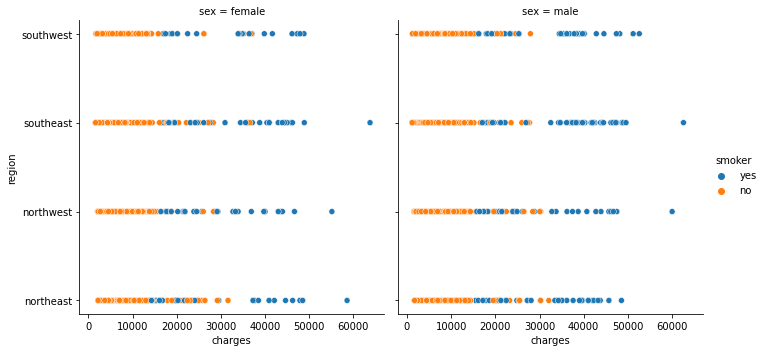

In [39]:
# scatter plot for charges vs region by smoker and cols as sex
sns.relplot(x=df.charges, y=df.region, hue=df.smoker, col=df.sex)  

plt.show()  # displays plot

## line and scatter plot

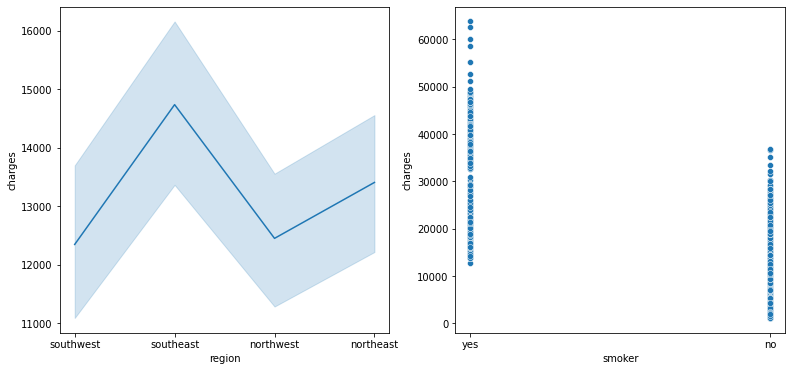

In [40]:
fig, axes = plt.subplots(
    ncols=2, figsize=(13, 6)
)  # plots a 2 x 2 subplot of figure size as 13 x 2
sns.lineplot(
    x="region", y="charges", data=df, ax=axes[0]
)  # lineplot no of years vs selling price
sns.scatterplot(
    x="smoker", y="charges", data=df, ax=axes[1]
)  # scatter plot no of years vs selling price
plt.show()  # displays plot

# Feature Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
# Binary Encoding:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in binary_cols:
    label_encoder(df, col)

In [42]:
le = LabelEncoder()
df["region"] = le.fit_transform(df["region"])

# Correlation heatmap


In [43]:
def correlation_heatmap(col_name, colormap="icefire_r"):

    # create a 1 x 2 subplot grid
    fig, ax = plt.subplots(ncols=2, figsize=(20, 8))  
    mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))

    # cornor heatmap of the dataframe correlation
    cat_heatmap = sns.heatmap(resign_corr, mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0], cmap=colormap)

    # sets the title for the heatmap with font size 14 and padding 12
    cat_heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 14}, pad=12)  

    # create heatmap for features correlating with the dependant variable
    heatmap = sns.heatmap(
        resign_corr[[col_name]].sort_values(by=col_name, ascending=False),
        vmin=-1,
        vmax=1,
        annot=True,
        ax=ax[1],
        cmap=colormap,
    )  

     # sets the title for the heatmap with font size 14 and padding 16
    heatmap.set_title(f"Features Correlating with {col_name}",fontdict={"fontsize": 14},pad=16)

    plt.show()  # shows the subplot


resign_corr = (df.corr())  # calculates correlation between dataframe columns using pearson correlation method

resign_corr.T  # dataframe transpose

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


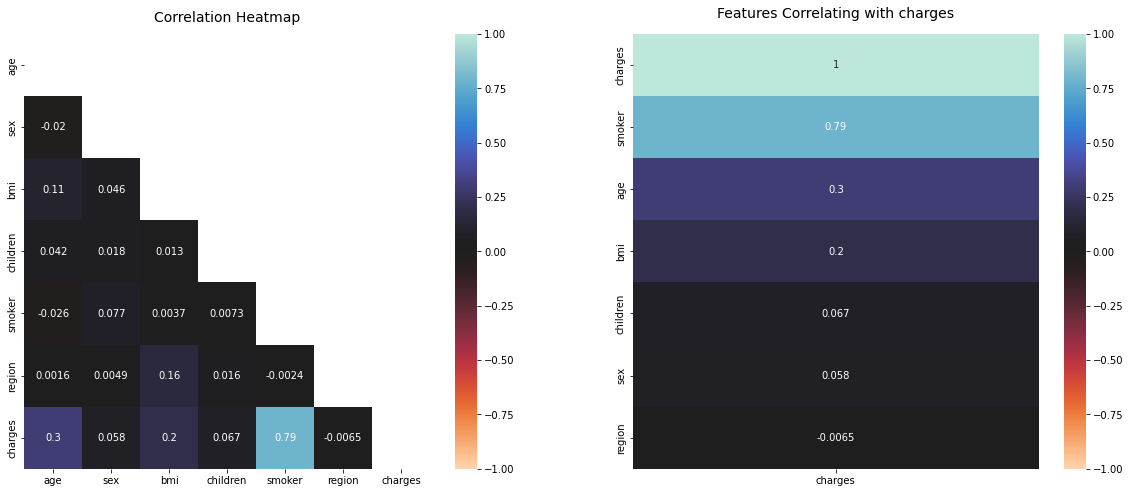

In [44]:
correlation_heatmap("charges")

# Data Splitting

In [45]:
X = df.drop(['charges','region'], axis = 1)  # Independent variables
y = df['charges']                            # Target/ dependent variable

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


# Feature scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()                 # Standardising the dataset
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Pipelining

In [47]:
# Importing the required algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

# creating instances of random forest and xgboost to use it for grid search
rf_reg = RandomForestRegressor()
xgb = XGBRegressor()

Grid search to find best parameters for random forest and Xgboost algorithms

In [48]:
# Finding the parameters that gives us the best r2 score
parameters = [{"n_estimators":[50,100,150,200],
               "criterion":["squared_error", "absolute_error", "friedman_mse", "poisson"]}]

grid_search = GridSearchCV(estimator = rf_reg,
                           scoring = "r2",    
                           param_grid = parameters,
                          )

grid_search.fit(X_train,y_train)
best_r2 = grid_search.best_score_
best_params = grid_search.best_estimator_,
print("Best r2 value : ",best_r2,"\n","best parameters : ",best_params)

Best r2 value :  0.8124924918309663 
 best parameters :  (RandomForestRegressor(criterion='poisson', n_estimators=150),)


In [49]:
# Finding the parameters that gives us the best r2 score
parameters_x = [{"n_estimators":[50,100,150,200],
                 "booster":["gbtree","gblinear","dart"]}]

grid_search_x = GridSearchCV(estimator = xgb,
                            scoring = "r2",
                            param_grid = parameters_x,
                            )
grid_search_x.fit(X_train,y_train)
best_r2_x = grid_search_x.best_score_
best_params_x = grid_search_x.best_estimator_
best_param = grid_search_x.best_params_
print("Best r2 value : ",best_r2_x,"\n","best parameters : ",best_params_x)

Best r2 value :  0.7997404545291076 
 best parameters :  XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [50]:
linear_model = LinearRegression()
rr = Ridge(alpha=0.01)
model_lasso = Lasso(alpha=0.01)
model_enet = ElasticNet(alpha = 0.01)
rf_reg = RandomForestRegressor(n_estimators = 150, criterion = "poisson")
xgb = XGBRegressor(n_estimators = 50, booster = "gbtree", max_depth= 3)

###pipeline

In [51]:
regressors = [('Linear Regression', linear_model), ('Ridge Regression', rr),
               ('Lasso Regression', model_lasso), ('Random Forest', rf_reg),  
                ('ElasticNet', model_enet),('XGBoost', xgb)]

# Fitting and Training and model evaluation

In [52]:
models = []
y_preds = []

for regressor_name, regressor in regressors:

    # Fit regressor to the training set
    models.append(regressor.fit(X_train, y_train))    
   
    # Predict 
    y_preds.append(regressor.predict(X_test))

In [53]:
models

[LinearRegression(),
 Ridge(alpha=0.01),
 Lasso(alpha=0.01),
 RandomForestRegressor(criterion='poisson', n_estimators=150),
 ElasticNet(alpha=0.01),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)]

In [54]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    explained_variance_score,
)


# function to evaluate model by using mean_absolute_error, mean_squared_error, root mean_squared_error, r2_score and explained_variance_score
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted) * 100
    accuracy = explained_variance_score(true, predicted) * 100
    return mae, mse, rmse, r2_square, accuracy


regev_df = pd.DataFrame(
    data=[
        [linear_model.__class__.__name__, *evaluate(y_test, y_preds[0])],  # calls evaluate() -> test set
        
        [rr.__class__.__name__,*evaluate(y_test, y_preds[1])],  # calls evaluate() -> test set
        
        [model_lasso.__class__.__name__,*evaluate(y_test, y_preds[2])],  # calls evaluate() -> test set

        [model_enet.__class__.__name__,*evaluate(y_test,  y_preds[4])],  # calls evaluate() -> test set
        
        [rf_reg.__class__.__name__,*evaluate(y_test, y_preds[3])],  # calls evaluate() -> test set
        
        [xgb.__class__.__name__,*evaluate(y_test, y_preds[5])],  # calls evaluate() -> test set
    ],
    columns=["Model Name", "MAE", "MSE", "RMSE", "R2 square", "Explained Variance Score"]  # column names for the dataframe
)

regev_df  # displays dataframe

,Model Name,MAE,MSE,RMSE,R2 square,Explained Variance Score
0,LinearRegression,4198.111800,3.590191e+07,5991.820601,80.462188,80.569178
1,Ridge,4198.138270,3.590224e+07,5991.848200,80.462008,80.569002
2,Lasso,4198.112614,3.590196e+07,5991.824662,80.462162,80.569153
3,ElasticNet,4212.220170,3.608075e+07,6006.725428,80.364865,80.473895
4,RandomForestRegressor,2768.197231,2.379790e+07,4878.309557,87.049187,87.139320
5,XGBRegressor,2492.434046,1.887426e+07,4344.451895,89.728632,89.744581


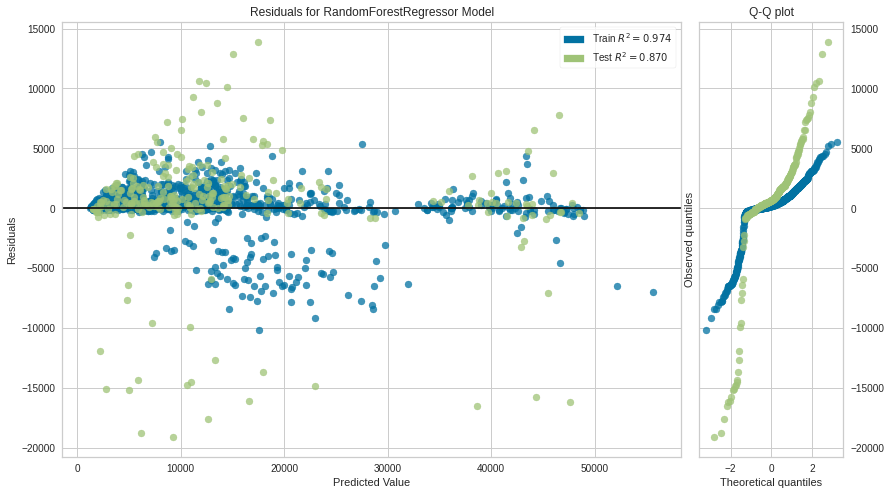

In [55]:
from yellowbrick.regressor import ResidualsPlot,PredictionError

plt.figure(figsize=(14, 8))  # sets figure size as 14 x 8

visualizer = ResidualsPlot(rf_reg, hist=False, qqplot=True)  # plots residuals plot with qqplot

visualizer.fit(X_train, y_train)  # fits visualizer

visualizer.score(X_test, y_test)  # sets score in plot's legend

visualizer.show()  # shows x_label, y_label, title & legend

plt.show()  # displays plot

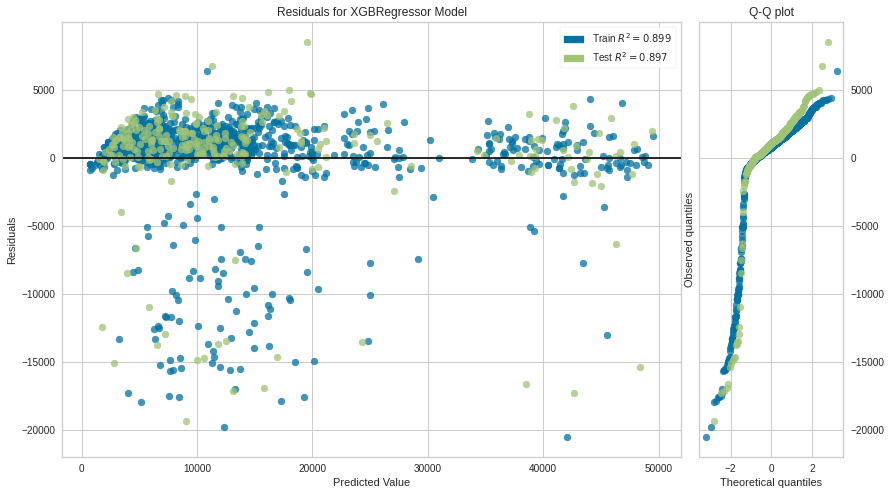

In [56]:
plt.figure(figsize=(14, 8))  # sets figure size as 14 x 8

visualizer = ResidualsPlot(xgb, hist=False, qqplot=True)  # plots residuals plot with qqplot

visualizer.fit(X_train, y_train)  # fits visualizer

visualizer.score(X_test, y_test)  # sets score in plot's legend

visualizer.show()  # shows x_label, y_label, title & legend

plt.show()  # displays plot

The resudial plots were normally distributed and have high density close to the origin

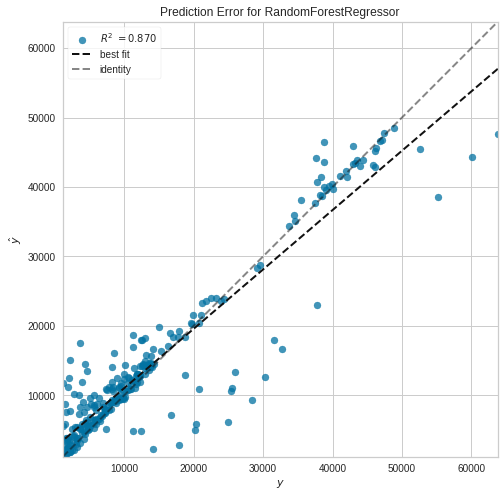

In [57]:
plt.figure(figsize=(14, 8))  # sets figure size as 14 x 8

visualizer = PredictionError(rf_reg)  # plots predict error plot

visualizer.fit(X_train, y_train)  # fits visualizer

visualizer.score(X_test, y_test)  # sets score in plot's legend

visualizer.show()  # shows x_label, y_label, title & legend

plt.show()  # displays plot

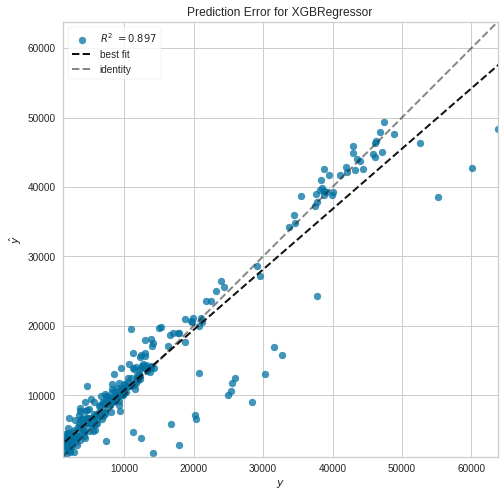

In [58]:
plt.figure(figsize=(14, 8))  # sets figure size as 14 x 8

visualizer = PredictionError(xgb)  # plots predict error plot

visualizer.fit(X_train, y_train)  # fits visualizer

visualizer.score(X_test, y_test)  # sets score in plot's legend

visualizer.show()  # shows x_label, y_label, title & legend

plt.show()  # displays plot

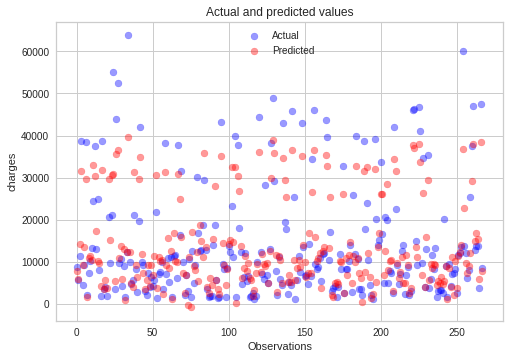

In [59]:
plt.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.4)
plt.scatter(x = range(0, y_preds[4].size), y=y_preds[4], c = 'red', label = 'Predicted', alpha = 0.4)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('charges')
plt.legend()
plt.show()

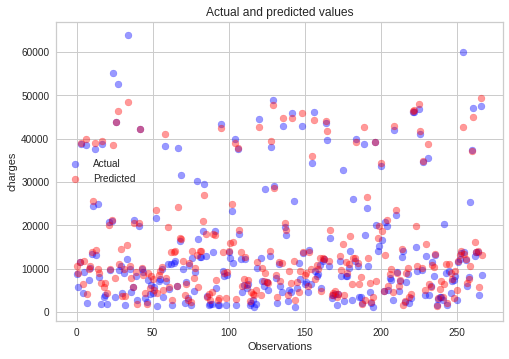

In [60]:
plt.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.4)
plt.scatter(x = range(0, y_preds[5].size), y=y_preds[5], c = 'red', label = 'Predicted', alpha = 0.4)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('charges')
plt.legend()
plt.show()

***From the above plots we can clearly see that the values predicted by the XGBoost algorithm was actually more accurate to the actual values than the ones predicted by random forest algorithm.***


*(I chose these 2 algorithm since these 2 have the highest r2 values and explained variance score)*

## Test predictions

In [61]:
def prediction(age,sex,bmi,children,smoker):
  
  models_test = [xgb, rf_reg, linear_model, rr, model_lasso, model_enet]

  y_preds_test = []
  
  reg_name = ["XGBoostRegressor", "Random Forest regressor", "Linear regression", "Ridge Regression", "Lasso Regression", "ElasticNet"]

  sex = 1 if sex.lower() == "male" or "m" else 0

  smoker = 1 if smoker.lower() == "yes" or "y" else 0
   
  values = sc.transform([[age,sex,bmi,children,smoker]])

  for i in models_test:

    y_preds_test.append(list(i.predict(values)))
    

  return reg_name, y_preds_test


In [62]:
model_name, y_results = prediction(19,'f',27.9,0,"y")

In [63]:
print("\nBest Predictions\n")
for i in range(2):
  print(f"{model_name[i]} : {y_results[i][0]}")

print("\nOther possible values\n")
for i in range(2,len(y_results)):
  print(f"{model_name[i]} : {y_results[i][0]}")


Best Predictions

XGBoostRegressor : 17152.064453125
Random Forest regressor : 17073.771537533357

Other possible values

Linear regression : 25004.240770768054
Ridge Regression : 25004.12886865403
Lasso Regression : 25004.25272100031
ElasticNet : 24944.733435825852


# Saving the model

In [64]:
import os
import joblib

if not os.path.exists("../content/drive/MyDrive/models/"):
    os.mkdir("../content/drive/MyDrive/models/")
# dump trained model as pickle file
joblib.dump(xgb, "../content/drive/MyDrive/models/insurance-predictor.pkl")
print("Successfully Completed !")

Successfully Completed !
